In [1]:
import pandas as pd
import math
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dfData = pd.read_csv('/home/archit/Desktop/ad_vs_organic/final_combined_organic_duration2.csv')

In [4]:
pd.value_counts(dfData['licensedContent'])

True     118272
False      2604
Name: licensedContent, dtype: int64

In [5]:
type(dfData['definition'][0])

str

In [6]:
pd.value_counts(dfData['Channel country'])

IN    60945
EG    48994
TH     3085
VN     2787
KR     1551
IT     1207
NL      597
US      439
ID      417
CA      351
AU      203
GB      178
ES       66
MX       56
Name: Channel country, dtype: int64

In [7]:
pd.value_counts(dfData['channelId'])

UCIt3SC3X_6DPGsBa-9_KffA    30521
UC3G-45OJY0VyLmlXMeFBOHw    18473
UCintIUOJEktQBfhEI9XXpuw    13618
UCl1uVuvB6Bam18_BBLGHPBA    11243
UCEhnoDvuuEjZ2yi9CxALPxg     9946
UClQoNRtJzV7AbyccCTAOUVA     6394
UCF1JIbMUs6uqoZEY1Haw0GQ     6341
UC7MlKIi4_Rvbhhvk5wiGysw     6236
UC8fvuZEXDpKYkgRyR3ihLXg     2680
UC7ZivIYRB0fMSGh-THcTYbw     1940
UCEzc9HSNLSD4O0YYHVK8iEg     1719
UCd4vEfDwg_kzVI-9Eq8sPHA     1551
UC9iBBFfq7L3ipvodSLrU8gQ     1303
UCJMnwi5o_kFjA_vPgEbQ8Sg     1031
UC0PKLLmL8pIJLjOI1gBH_pA      943
UC1gdQWjgZQh6J_7Q7KbzgZA      597
UCFIDd6HoHgWHBiOEJQcOrCQ      383
UCARulCdNvJAj9HX-gmo4Uhg      351
UCBpeCqSaVRvIDuOHQ8LZ1Mg      344
UCaxDxh_zlTTSVXjrl9D-fDQ      331
UCeoczKQcmtP04T7ZFql_VQw      329
UCn1ZWLl8wrAmAIjB-L3H_cw      319
UC4HASgkb75MnG2kMbC-zQrQ      310
UCfqAqFOAcVM9LC27GKZobEw      281
UCK6W10JbStSDv03F0mynVTQ      256
UC5_MeJPVvUbWRSgy7gj6AYQ      241
UCHPEi7SmY-Znvfhu558igrA      210
UC2g6hyaN0SfSxOAxDCM1Qgw      203
UC5UvlXyHmdpWw7lvp8UJ79A      200
UCiL0s4mqzY7dM

### Categories exploration

,vid,Mean Views
categoryId,,
23.0,846,596243
1.0,3119,181611
24.0,73517,146219
22.0,1764,145961
44.0,19,126540
28.0,360,100051
10.0,9516,88295
19.0,91,88077
27.0,975,44838


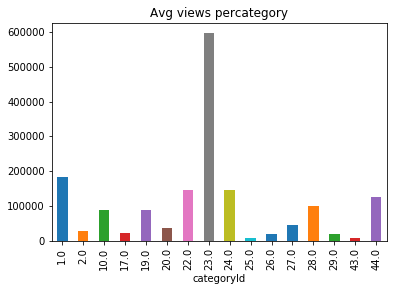

In [8]:
dfData.groupby('categoryId').viewCount.mean().plot(kind = 'bar', title = 'Avg views percategory')
avVal = dfData.groupby('categoryId').viewCount.mean().fillna(0).astype(dtype = 'int64').sort_values(ascending = False)
dfCat = dfData.groupby('categoryId').count()
dfCat['Mean Views'] = avVal
dfCat = dfCat[['vid', 'Mean Views']]
dfCat.sort_values(by = ['Mean Views'], ascending = False)

### Channel Ids exploration

,vid,Mean Views
channelId,,
UCIt3SC3X_6DPGsBa-9_KffA,30521,10139
UC3G-45OJY0VyLmlXMeFBOHw,18473,9323
UCintIUOJEktQBfhEI9XXpuw,13618,174070
UCl1uVuvB6Bam18_BBLGHPBA,11243,15660
UCEhnoDvuuEjZ2yi9CxALPxg,9946,49436
UClQoNRtJzV7AbyccCTAOUVA,6394,15658
UCF1JIbMUs6uqoZEY1Haw0GQ,6341,935571
UC7MlKIi4_Rvbhhvk5wiGysw,6236,12838
UC8fvuZEXDpKYkgRyR3ihLXg,2680,34163


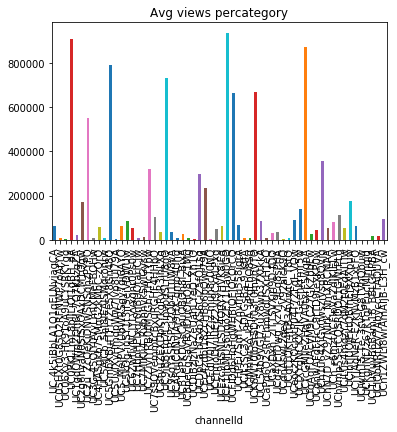

In [9]:
dfData.groupby('channelId').viewCount.mean().plot(kind = 'bar', title = 'Avg views percategory')
avVal2 = dfData.groupby('channelId').viewCount.mean().fillna(0).astype(dtype = 'int64').sort_values(ascending = False)
dfCha = dfData.groupby('channelId').count()
dfCha['Mean Views'] = avVal2
dfCha = dfCha[['vid', 'Mean Views']]
dfCha.sort_values(by = ['vid'], ascending = False)

In [10]:
dfData = dfData.drop('Unnamed: 0', axis =1)
dfData.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'],
      dtype='object')

### Creating final cleaned dataset

In [11]:
dfData2 = dfData.drop(['licensedContent', 'definition', 'relevantTopicIds', 'topicIds', 'topicCategories', 'channelTitle', 'Channel Title', 'Channel Description', ' Channel hiddenSubscriberCount', 'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'], axis = 1)

In [12]:
dfData2.columns

Index(['vid', 'channelId', 'duration', 'dislikeCount', 'commentCount',
       'favoriteCount', 'viewCount', 'likeCount', 'title', 'description',
       'tags', 'categoryId', 'publishedAt', 'Channel Publish date',
       'Channel viewCount', 'Channel subscriberCount', 'Channel commentCount',
       'Channel videoCount'],
      dtype='object')

In [13]:
# Loading ad stats dataset
dfAdStats = pd.read_csv('/home/archit/Desktop/ad_vs_organic/resultstats.csv')
dfAdStats2 = dfAdStats.drop(['ch_id','Unnamed: 0'], axis =1)
dfAdStats2.rename(columns = {'video_id':'vid'}, inplace = True)
dfAdStats2.head()

,ad%,vid
0,98.870521,rjxAZLcdiyQ
1,0.000000,ZZpyNDdBQW0
2,0.000000,Pi5dS1x2MjU
3,0.006709,YUtU2FLxsvw
4,0.000000,r5eixuMy-Vk


In [14]:
# Loading perv stats dataset
dfPrevStats = pd.read_csv('/home/archit/Desktop/ad_vs_organic/previousVideoStats2.csv')
dfPrevStats = dfPrevStats.drop(['Unnamed: 0'], axis =1)
dfPrevStats.rename(columns = {'Id':'vid'}, inplace = True)

dfPrevStats.head()

,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,vid
0,9.0,5.0,112.0,2016-08-25T03:48:52.000Z,21007.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 13 - Hà...,NaN
1,7.0,6.0,77.0,2016-11-15T06:59:55.000Z,19326.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 14 - Kh...,LPqCSwCNI5w
2,28.0,12.0,109.0,2016-11-15T07:01:46.000Z,33071.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 17 - Gi...,0LGl5jbnrlU
3,8.0,9.0,84.0,2016-11-15T07:01:55.000Z,29516.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 18 - C...,jFFSYwdku9M
4,12.0,18.0,145.0,2016-11-15T07:02:03.000Z,49653.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 19 - Ăn...,HvFNGb-nrRU


### Merging Dataset

In [15]:
dfMergedData = dfData2.merge(dfPrevStats, on = 'vid', how = 'left')
dfMergedData = dfMergedData.merge(dfAdStats2, on = 'vid', how = 'left')

In [18]:
dfMergedData.columns

Index(['vid', 'channelId', 'duration', 'dislikeCount', 'commentCount',
       'favoriteCount', 'viewCount', 'likeCount', 'title', 'description',
       'tags', 'categoryId', 'publishedAt', 'Channel Publish date',
       'Channel viewCount', 'Channel subscriberCount', 'Channel commentCount',
       'Channel videoCount', 'PrevCommentCount', 'PrevDislikeCount',
       'PrevLikeCount', 'PrevPublishedAt', 'PrevViewCount', 'PrevTitle',
       'ad%'],
      dtype='object')

dfMergedData.to_csv("/home/archit/Desktop/ad vs organic/merged_data_ad_vs_org.csv")

In [45]:
dfMergedData = pd.read_csv('/home/archit/Desktop/ad vs organic/merged_data_ad_vs_org.csv')

### Picking up traininig set and validation set

In [19]:
dfTrainingSet = dfMergedData.loc[dfMergedData['ad%'] == 0,]
dfTrainingSet.shape

(112873, 25)

In [20]:
dfValidationSet = dfMergedData.loc[dfMergedData['ad%']>0, ]
dfValidationSet.shape

(8003, 25)

dfTrainingSet.to_csv("/home/archit/Desktop/ad vs organic/training_data_ad_vs_org3.csv")


In [48]:
dfValidationSet['orgViews'] = dfValidationSet['viewCount']*(100-dfValidationSet['ad%'])

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
dfValidationSet.drop('viewCount', axis=1, inplace= True)
dfValidationSet.rename(columns = {'orgViews':'viewCount'}, inplace = True)

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/archit/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
dfTrainingSet = pd.concat([dfTrainingSet, dfValidationSet], ignore_index = True)

In [24]:
dfTrainingSet.shape

(36515, 26)

In [25]:
dfValidationSet.to_csv('/home/archit/Desktop/ad vs organic/validation_data_ad_vs_org3.csv')

### Feature engineering


In [21]:
def feature_engineer(dfData):
    dfData =dfData.drop(['favoriteCount', 'PrevTitle', 'PrevPublishedAt', 'Channel commentCount', 'categoryId'],axis =1)
    
    
    dfData['PublishedYear'] = dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['Channel Publish date'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['Channel viewCount'])
    dfData['LikeDislikeRatio'] = dfData['likeCount']/(dfData['dislikeCount'] + dfData['likeCount'])
    dfData['PrevCommentCount'] = dfData['PrevCommentCount'].fillna(0)
    dfData['PrevDislikeCount'] = dfData['PrevDislikeCount'].fillna(0)
    dfData['PrevLikeCount'] = dfData['PrevLikeCount'].fillna(0)
    dfData['PrevViewCount'] = dfData['PrevViewCount'].fillna(0)   
    dfData['duration'] = dfData['duration'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['Channel subscriberCount'] = dfData['Channel subscriberCount'].fillna(0)
    dfData = dfData.drop(['title','description','publishedAt','Channel viewCount','Channel Publish date','channelId','tags', 'ad%'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

In [22]:
def feature_engineer2(dfData):
    dfData =dfData.drop(['favoriteCount', 'PrevTitle', 'PrevPublishedAt', 'Channel commentCount'],axis =1)
    dfData['is_english'] = dfData['Lang'].apply(lambda x: 1 if x=='en' else 0)
    dfData = dfData.drop('Lang', axis=1)
    
    dfData = dfData.dropna()
    dfData['PublishedYear'] = dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['Channel Publish date'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['Channel viewCount'])
    dfData['LikeDislikeRatio'] = dfData['likeCount']/(dfData['dislikeCount'] + dfData['likeCount'])
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData = dfData.drop(['title','description','publishedAt','','Channel Publish date','channelId','tags', 'ad%'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

In [23]:
df = feature_engineer(dfTrainingSet)
#df.to_csv('/home/archit/Desktop/ad vs organic/trainSet2.csv')

In [25]:
X, y = df.drop('viewCount',axis = 1) , np.log(df['viewCount'])
y.shape

(112873,)

In [26]:
X.columns

Index(['vid', 'duration', 'dislikeCount', 'commentCount', 'likeCount',
       'Channel subscriberCount', 'Channel videoCount', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount', 'PublishedYear',
       'ChannelAge', 'channelViewCount', 'LikeDislikeRatio'],
      dtype='object')

In [55]:
#X.to_csv('/home/archit/Desktop/ad vs organic/trainSET.csv')

### Modeling

In [27]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor

/home/archit/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

#train_X_id, train_X = train_X.vid, train_X.drop('vid', axis = 1)
#test_X_id, test_X = test_X.vid, test_X.drop('vid', axis = 1)

reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

import pickle
pickle.dump(reg, open("/home/archit/Desktop/ad_vs_organic/Gbr005.pickle.dat", "wb"))

In [29]:
pred = reg.predict(test_X)

In [30]:
size = test_y.shape[0]
test_yL = test_y.tolist()
predL = pred.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
mape={}
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
rmse = math.sqrt(sum(sqErr) /size)/ (test_y.max() - test_y.min())
dfEval = pd.DataFrame({'Id':test_X_id, 'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Id,Pred
64566,53372.0,-623.559780,uB4CAQyd_fc,53995.559780
1150,25824.0,306.200560,bE9C0qouXp0,25517.799440
112580,1442.0,380.575703,LDVwYTOwiXs,1061.424297
15447,143.0,-286.119363,t-8aENaoTTk,429.119363
94959,1554.0,-331.489890,v9lg_GDFMdc,1885.489890


In [31]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:2519.3614769302526


In [32]:
1011.0650776175543/dfEval['Actual'].mean()

0.03910346961150082

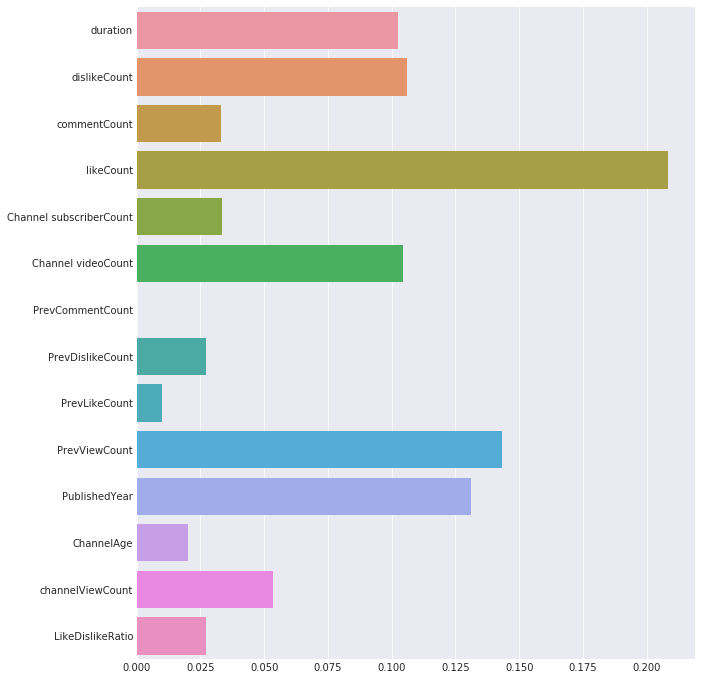

In [33]:
X = X.drop('vid', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

### Modeling on validation set

In [91]:
df = feature_engineer(dfValidationSet)